# 1. Using the Binomial Distribution

## (a)

In [3]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt
import math


def ensemble_accuracy(n_models, model_accuracy):
    p = model_accuracy
    majority = (n_models // 2) + 1  # Majority threshold
    prob_correct = sum(binom.pmf(k, n_models, p) for k in range(majority, n_models + 1))
    return prob_correct

# Ensemble accuracy for 15 models with 63% accuracy
n_models_a = 15
model_acc_a = 0.63
ensemble_acc_a = ensemble_accuracy(n_models_a, model_acc_a)
print(f"Ensemble accuracy: {ensemble_acc_a:.4f}")

Ensemble accuracy: 0.8513


# (b)

In [5]:
n_models_b = 15
desired_ensemble_acc = 0.95

for acc in range(1, 101):  # Checking whole number percentages
    model_acc_b = acc / 100
    if ensemble_accuracy(n_models_b, model_acc_b) >= desired_ensemble_acc:
        print(f"Minimum individual model accuracy: {acc}%")
        break

Minimum individual model accuracy: 71%


## (c)

In [7]:
model_acc_c = 0.63
n_models_c = 15  # Start with 15 and increase

while ensemble_accuracy(n_models_c, model_acc_c) < desired_ensemble_acc:
    n_models_c += 2  # Increase by 2 to keep it odd

print(f"Minimum number of models needed: {n_models_c}")

Minimum number of models needed: 39


# 2. Working with Random Data

## (a)

In [10]:
pmf = {1: 0.1, 2: 0.2, 3: 0.3, 4: 0.2, 5: 0.2}  # Ensures probabilities sum to 1

def generate_random_x(pmf, size=50):
    values, probabilities = zip(*pmf.items())
    samples = np.random.choice(values, size=size, p=probabilities)
    return np.mean(samples)

def run_simulations(pmf, num_simulations=1000, sample_size=50):
    means = [generate_random_x(pmf, sample_size) for _ in range(num_simulations)]
    return means

## (b)

In [12]:
# Generate 50 random X-values and compute their mean
sample_mean = generate_random_x(pmf)
print(f"Sample mean of 50 values: {sample_mean:.4f}")

Sample mean of 50 values: 3.3200


## (c)

In [14]:
# Run the function 1000 times and store means
means_list = run_simulations(pmf)

## (d)

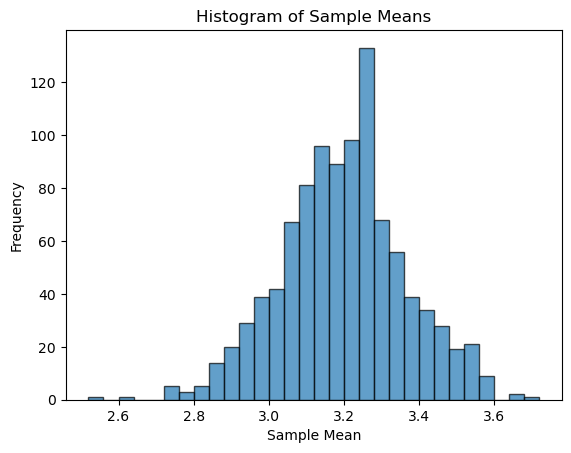

In [16]:
# (d) Create histogram of means
plt.hist(means_list, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

The histogram appears to have a standard bell-curve shape. This is expected due to the Central Limit Theorem (CLT), which states that the distribution of the sample means will be approximately normal, regardless of the original distribution, as long as the sample size is sufficiently large.

## (e)

In [19]:
# Compute mean and standard deviation of means
mean_of_means = np.mean(means_list)
std_of_means = np.std(means_list, ddof=1)
print(f"Mean of means: {mean_of_means:.4f}")
print(f"Standard deviation of means: {std_of_means:.4f}")

Mean of means: 3.1945
Standard deviation of means: 0.1720


In [20]:
# Theoretical values
true_mean = sum(x * p for x, p in pmf.items())
true_std = math.sqrt(sum((x - true_mean) ** 2 * p for x, p in pmf.items()) / 50)
print(f"Theoretical mean: {true_mean:.4f}")
print(f"Theoretical standard deviation: {true_std:.4f}")

Theoretical mean: 3.2000
Theoretical standard deviation: 0.1766
